In [1]:
# a very large list of strings
strings = ['foo', 'foobar', 'baz', 'qux',
           'python', 'Guido Van Rossum'] * 100000

method1 = [x for x in strings if x.startswith('foo')]

method2 = [x for x in strings if x[:3] == 'foo']

%time method1 = [x for x in strings if x.startswith('foo')]

Wall time: 129 ms


In [2]:
%time method2 = [x for x in strings if x[:3] == 'foo']

Wall time: 103 ms


In [3]:
#timeit runs it a number of times
%timeit [x for x in strings if x.startswith('foo')]

10 loops, best of 3: 131 ms per loop


In [4]:
 %timeit [x for x in strings if x[:3] == 'foo']

10 loops, best of 3: 95.3 ms per loop


In [5]:
x = 'foobar'
y = 'foo'

%timeit x.startswith(y)

The slowest run took 9.47 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 3: 234 ns per loop


In [7]:
%timeit x[:3] == y

1000000 loops, best of 3: 206 ns per loop


In [11]:
#set up for profiling
import numpy as np
from numpy.linalg import eigvals

def run_experiment(niter=100):
    K = 100
    results = []
    for _ in range(niter):
        mat = np.random.randn(K, K)
        max_eigenvalue = np.abs(eigvals(mat)).max()
        results.append(max_eigenvalue)
    return results
some_results = run_experiment()
print ('Largest one we saw:', np.max(some_results)) 

Largest one we saw: 11.4572780139


In [12]:
#use the prun command to run profiling
%prun -l 7 -s cumulative run_experiment()

In [1]:
#example of line profiling (be sure to install line_profile package in anaconda first)
from numpy.random import randn

def add_and_sum(x, y):
    added = x + y
    summed = added.sum(axis=1)
    return summed

def call_function():
    x = randn(1000, 1000)
    y = randn(1000, 1000)
    return add_and_sum(x, y)

#built-in profiling

x = randn(3000, 3000)
y = randn(3000, 3000)
%prun add_and_sum(x, y)    

In [3]:
#profile the above with line profiler
%load_ext line_profiler
%lprun -f add_and_sum add_and_sum(x, y)

In [4]:
%lprun -f add_and_sum -f call_function call_function()

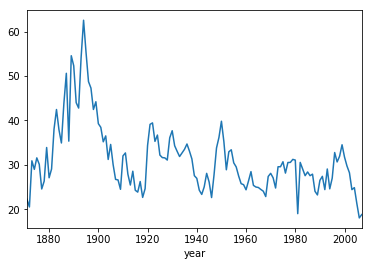

C:\Users\Deanna\Anaconda3\lib\site-packages\ipykernel_launcher.py:67: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix


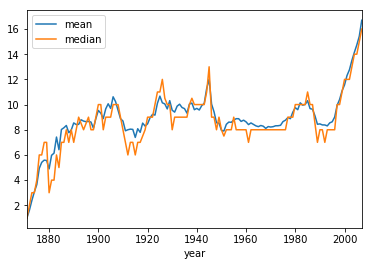

In [5]:
#pandas examples of group by
import numpy as np
import pandas as pd
import pylab as pl

baseball = pd.read_csv("http://bit.ly/144sh7t")

# group by year and get a summary of each numeric column
baseball.groupby(["year"]).describe()
# for each year, get the mean of each column
baseball.groupby(["year"]).aggregate(np.mean)
# you can create group objects
baseball_grouped = baseball.groupby(["year"])
# getting the count of rows for each league
baseball.groupby("lg").size()
# lg
# AA      171
# AL    10007
# FL       37
# NL    11378
# PL       32
# UA        9

# records per year
baseball.groupby(["year"]).size()
# year
# 1871     7
# 1872    13
# 1873    13
# 1874    15
# 1875    17
# ...

def analyze(df):
    return pd.Series({"nrow": len(df), "ncol": len(df.columns)})
# rows and columns per league
baseball.groupby("lg").apply(analyze)
#     ncol   nrow
# lg             
# AA    22    171
# AL    22  10007
# FL    22     37
# NL    22  11378
# PL    22     32
# UA    22      9

# aggregate over year and get mean RBIs per year
mean_rbis = baseball.groupby("year")['rbi'].aggregate(np.mean)
mean_rbis.head()
# year
# 1871    22.285714
# 1872    20.538462
# 1873    30.923077
# 1874    29.000000
# 1875    31.588235

mean_rbis.plot()
pl.show()

def years_played_to_date(player):
    years_to_date = player.year - np.min(player.year) + 1
    player['years_to_date'] = years_to_date
    return player

# for each player, calculate the number of years played
players = baseball.groupby("id").apply(years_played_to_date)
players.ix[players.id=="ansonca01"]
#            id  year  stint team  ...  years_to_date
# 0   ansonca01  1871      1  RC1  ...              1
# 7   ansonca01  1872      1  PH1  ...              2
# 20  ansonca01  1873      1  PH1  ...              3
# 33  ansonca01  1874      1  PH1  ...              4
# 48  ansonca01  1875      1  PH1  ...              5

# get the mean and median years played and plot it
players.groupby("year").aggregate([np.mean, np.median]).years_to_date.plot()
pl.show()

In [11]:
#applying functions element-wise
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris()


df = pd.DataFrame(iris.data, columns=iris.feature_names)
print(df.columns)
# apply
cols = df.columns[0:4]
# divide each numeric column by 2
df[cols].apply(lambda x: x / 2).head()
# divide 1 column by 2
df[sepal length (cm)].apply(lambda x: x / 2).head()

SyntaxError: invalid syntax (<ipython-input-11-438de5a0009c>, line 15)